# ЛАБОРАТОРНА РОБОТА  

## "Алгоритми та моделі перетворення даних"

__Метою__ лабораторної роботи є набуття практичних навичок використання модулів бібліотеки `Scikit-learn` для вирішення наступних задач:

- визначення та розподілення данних по їх типам
- вибір та застосування алгоритмів перетворення різноманітних типів даних
- настроювання параметрів та застосування трансформерів
- побудова конвеєра для автоматизації процесів трансформації даних

__Результатом__ виконання лабораторної роботи повинен стати датасет, в якому колонки з покажчиком перетворені під для навчання моделей

In [2]:
# імпортувати бібліотеки pandas та numpy
import pandas as pd
import numpy as np

## Завдання

Вхідним датасетом є csv-файл, отриманий в результаті виконання лабораторної роботи по конструюванню та очищеню покажчиків даних про продажі квартир рієлторської компанії.

<h4 style='background-color:cyan; color:red; padding:15px'><ul>
    <li>замість `...` вписуйте Ваш програмний код
    <li>не змінюйте імена запропонованих зміних
    </ul>
</h4>

In [3]:
# ззчитати підготовлений датасет `apartments_clean.csv` в датафрейм та проінспектувати його стан
data = pd.read_csv("apartments_clean.csv")
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())

      Price  rooms  price_per_m2  level  levels    year  area_total  \
0   30970.0    1.0        1106.0   12.0    13.0  2013.0        28.0   
1   30970.0    1.0        1106.0   12.0    13.0  2013.0        28.0   
2   82000.0    2.0        1281.0   18.0    26.0  2009.0        64.0   
3  135000.0    2.0        2077.0   16.0    23.0  2012.0        65.0   
4   84000.0    2.0        1273.0    6.0    26.0  2009.0        66.0   

   area_living  area_kitchen           street    type     district  
0         13.0           5.0  Петропавлівська   площа  Оболонський  
1         13.0           5.0  Петропавлівська  вулиця  Подільський  
2         37.0          14.0      Дніпровська  вулиця  Оболонський  
3         25.0          18.0      Дніпровська  вулиця  Оболонський  
4         37.0          18.0      Дніпровська  вулиця  Оболонський  
        Price  rooms  price_per_m2  level  levels    year  area_total  \
478   42900.0    2.0         998.0    1.0     5.0  2009.0        43.0   
479  115000.0

## 1. Визначення типів покажчиків вхідного датасету

In [4]:
# відокремити від робочого датасету колонку з цільовим показчиком (`Price`) 
# та вилучити її з обробки
y = data['Price']
target = data.drop('Price', axis=1)
print(target.head())

   rooms  price_per_m2  level  levels    year  area_total  area_living  \
0    1.0        1106.0   12.0    13.0  2013.0        28.0         13.0   
1    1.0        1106.0   12.0    13.0  2013.0        28.0         13.0   
2    2.0        1281.0   18.0    26.0  2009.0        64.0         37.0   
3    2.0        2077.0   16.0    23.0  2012.0        65.0         25.0   
4    2.0        1273.0    6.0    26.0  2009.0        66.0         37.0   

   area_kitchen           street    type     district  
0           5.0  Петропавлівська   площа  Оболонський  
1           5.0  Петропавлівська  вулиця  Подільський  
2          14.0      Дніпровська  вулиця  Оболонський  
3          18.0      Дніпровська  вулиця  Оболонський  
4          18.0      Дніпровська  вулиця  Оболонський  


In [5]:
# для самоперевірки: кількисть рядків в датасетах повинна співпадати!
target.shape, data.shape

((483, 11), (483, 12))

In [6]:
# імпортувати з sklearn модуль, що відповідає за селективний відбір покажчиків
from sklearn.compose import make_column_selector

In [8]:
# побудувати  селектори для вібіру числових та категоріальних колонок
numeric_selector = make_column_selector(dtype_include=np.number)
category_selector = make_column_selector(dtype_include=object)

In [9]:
# застосувати побудовані селектори для створення списків числових та категоріальних показчиків
numeric_data_columns = list(target.loc[:, numeric_selector])
category_data_columns = list(target.loc[:, category_selector])

print(f'список числових покажчиків = {numeric_data_columns}')
print(f'список категоріальних покажчиків = {category_data_columns}')

список числових покажчиків = ['rooms', 'price_per_m2', 'level', 'levels', 'year', 'area_total', 'area_living', 'area_kitchen']
список категоріальних покажчиків = ['street', 'type', 'district']


In [10]:
# створити 2 окремі датасети: числовий та категоріальний та вивести їх основні властивості
data_numeric = target.loc[:, numeric_data_columns]
data_category = target.loc[:, category_data_columns]

data_numeric.info()
data_numeric.describe()
data_numeric.head()

data_category.info()
data_category.describe()
data_category.head()

data_numeric.shape, data_category.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rooms         483 non-null    float64
 1   price_per_m2  483 non-null    float64
 2   level         483 non-null    float64
 3   levels        483 non-null    float64
 4   year          483 non-null    float64
 5   area_total    483 non-null    float64
 6   area_living   483 non-null    float64
 7   area_kitchen  483 non-null    float64
dtypes: float64(8)
memory usage: 30.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   street    483 non-null    object
 1   type      483 non-null    object
 2   district  483 non-null    object
dtypes: object(3)
memory usage: 11.4+ KB


((483, 8), (483, 3))

## 2. Маштабування числових та категоріальних колонок

### 2.1. Маштабування числових показчиків

In [11]:
# з модуля `preprocessing` імпортувати нормалізатор 'MinMaxScaler' та стандартизатор 'StandardScaler'
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
# створити відповідні маштабувачі
standart_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [13]:
# побудувати змаштабовані датасети за двома стратегіями: стандартизація та нормалізація
data_numeric_std = standart_scaler.fit_transform(data_numeric)
data_numeric_min_max= min_max_scaler.fit_transform(data_numeric)

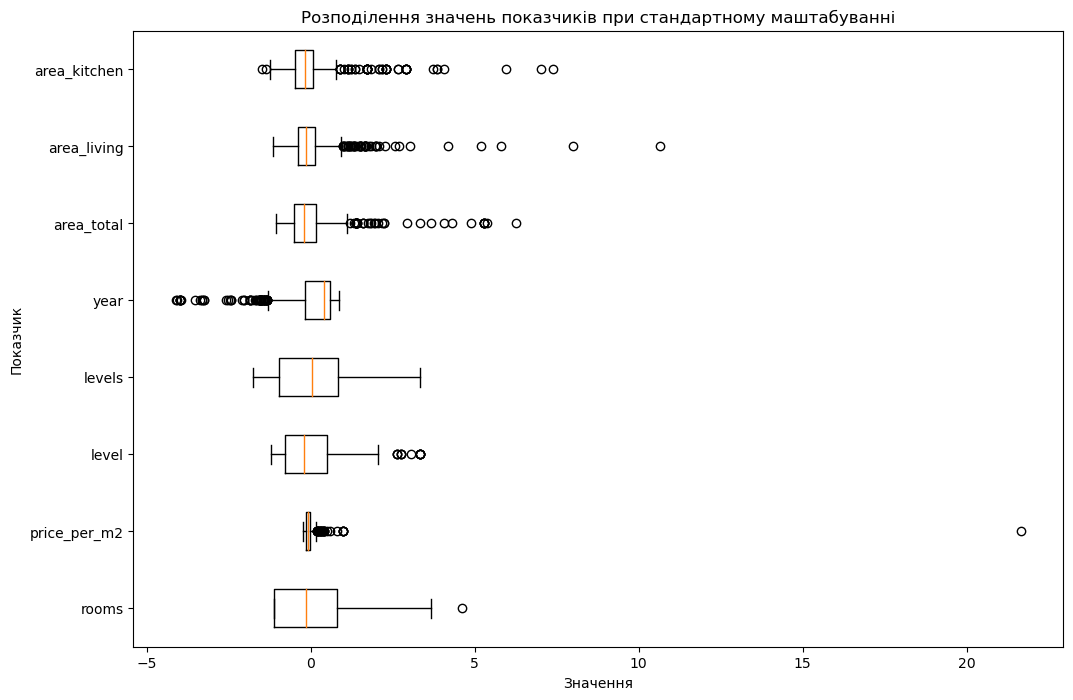

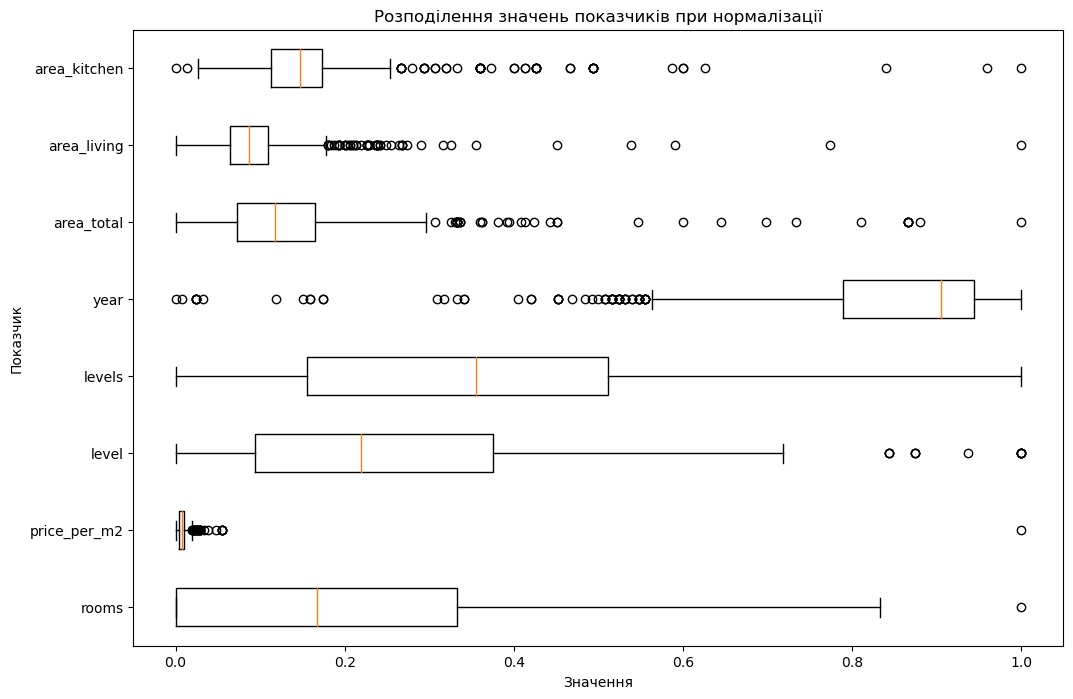

In [14]:
# побудувати графіки розподілення значень показчиків при
# стандартном та нормалізованом маштабуванні
import matplotlib.pyplot as plt

# побудова графіків розподілення значень показчиків при стандартному маштабуванні
plt.figure(figsize=(12, 8))
plt.boxplot(data_numeric_std, vert=False, labels=numeric_data_columns)
plt.title('Розподілення значень показчиків при стандартному маштабуванні')
plt.xlabel('Значення')
plt.ylabel('Показчик')
plt.show()

# побудова графіків розподілення значень показчиків при нормалізації
plt.figure(figsize=(12, 8))
plt.boxplot(data_numeric_min_max, vert=False, labels=numeric_data_columns)
plt.title('Розподілення значень показчиків при нормалізації')
plt.xlabel('Значення')
plt.ylabel('Показчик')
plt.show()

#####  __проаналізувати графіки та визначись який маштабувач краще підходить до числовї підмножини робочого датасету__

### 2.1. Маштабування категоріальних показчиків

In [15]:
# з модуля `preporcessing` імпортувати кодувальники 'OrdinalEncoder' та 'OneHotEncoder'
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [16]:
# проаналізувати категоріальні показчики та визначитись до якого показчика
# який енкодер доцільно застосовувати
ordinal_Encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

In [17]:
# створити енкодери та закодувати ними відповідні категоріальні колонки
ordinal_encoder = ordinal_Encoder.fit_transform(data_numeric)
one_hot_encoder = onehot_encoder.fit_transform(data_category)

## 3. Побудова трансформера для підготовки даних

In [18]:
# з модуля `compose` імпортувати трансформер колонок `ColumnTransformer`
from sklearn.compose import ColumnTransformer

In [19]:
# побудувати трансформер для предобробки числових та категоріальних показчиків
# робочого датасету
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_data_columns),
        ('cat', OneHotEncoder(), category_data_columns)
    ])
print(transformer)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['rooms', 'price_per_m2', 'level', 'levels',
                                  'year', 'area_total', 'area_living',
                                  'area_kitchen']),
                                ('cat', OneHotEncoder(),
                                 ['street', 'type', 'district'])])


In [20]:
# отримати вихідний масив застосував трансфомер до вхідного датасуту
data_transformed = transformer.fit_transform(data)
data_transformed.shape

(483, 203)

In [21]:
# побудувати вихідний датафрейм з вихідного масиву додавши в першу колонку
# ціловий показчик `target`
apartment_transformed = pd.concat([pd.DataFrame(target, columns=['target']), pd.DataFrame(data_transformed)], axis=1)


In [22]:
# Проінспектувати вихідний датасет `apartment_transformed`
print(apartment_transformed.head())


   target                                                  0
0     NaN    (0, 0)\t-1.1039847398821212\n  (0, 1)\t-0.15...
1     NaN    (0, 0)\t-1.1039847398821212\n  (0, 1)\t-0.15...
2     NaN    (0, 0)\t-0.1517979017337915\n  (0, 1)\t-0.12...
3     NaN    (0, 0)\t-0.1517979017337915\n  (0, 1)\t-0.01...
4     NaN    (0, 0)\t-0.1517979017337915\n  (0, 1)\t-0.12...


In [23]:
# зберегти підготовлений датасет в csv-файлі `apartment_transformed.csv`
apartment_transformed.to_csv('apartment_transformed.csv', index=False)